# Algoritmos básicos de redes neuronales: Perceptrón

- Fue introducido por Rossenblar a finales de los años 50
- Se inspira en los procesos de aprendizaje de los animales en los cuales la información va atravesando diferentes capas de neuronas
- Es un modelo unidireccional, compuesto por dos capas de neuronas, una de entrada y otra de salida
- La operación de este tipo puede darse con _n_ neuronas de entrada y _m_ de salida.

### Definición
- Las neuronas de entrada no realizan ningún computo
- Se consideran señales discretas 0 o 1
- La operación para _n_ neuoronas de entrada y _m_ de salida puede considerarse así:
$$y_i = H(\sum_{j=1}^{n}w_{ij}x_{j}-\Theta_{i}), \forall i, 1<= i <=m$$

Donde H(x) es la función escalón. $w_{ij}$ los pesos, x_{j} las entradas que recibe cada estimulo y $\Theta_{i}$ es el umbral.

- El perceptrón permite clasificar dos conjuntos linealmente separables en un plano o hiperplano. 
- La respuesra de la neurona es 1 si pertenece a la clase o 0 si no pertenece

**Ejemplo de prueba**
- Sea una neurona tipo perceptrón con entrada $x_1$ y $x_2$
- Entonces la operación se define como

$$y = H(w_1 x_1 + w_2 x_2 - \Theta)$$

En este caso la función es lineal, muestra entonces una recta que divide el plano en dos regiones. Por lo tanto, se requiere que el problema de clasificación (binaria) requiere una solución lineal: or y and se pueden resolver con perceptrón, pero xor no. Podría resolver problemas mas complejos, como xor, pero para ello requiero mas de una capa. Esto es un perceptrón de dos capas. La complejidad se puede ampliar con las capas, permitiendo regiones convexas. 

## Algoritmo de aprendizaje del perceptrón

- La idea principal del entrenamiento es es minimizar los errores, esto es la diferencia entre la estimación $\hat{y}$ y lo observado $y$.
- Vamos a introducir una tasa de aprendizaje _n_ que indica el ritmo de aprendizaje. Si la tasa de aprendizaje es mul alta es posible que no se encuentre una solución, ya que no logra una solución convergente y empieza a oscilar. Si es muy pequeño, el entrenamiento se demoraría demasiado. 
- Dados unos patrones $x^u$, salidas obtenidas $y^u$ y salidas deseadas $t^u$
- Los pesos iniciales son aleatorios entre -1 y 1
- Se examina cada patrón y aplicamos la relación de cambio

$$\triangle w_{ij}^{u}(t)=n(t_i ^u - y_i ^u)x_j ^u$$

A esto se le conoce como **regla del perceptrón**

La idea es ajustar los pesos para poder realizar la separación lineal que nos interesa. Acá estamos considerando un problema de clasificación lineal, que son los problemas que resuelven los **perceptrónes monocapa**

### Algoritmo de aprendizaje

Desarrollaremos un algoritmo de clasificación entre 0 y 1.

1. Inicializamos los pesos aleatoriamente entre [-1,1]
2. Para el estado _t_, $\hat{y}$ o salida deseada. Calcular:

$$\hat{y} = t^{u}(k)=H(\sum_{j=1}^n (x_j j)-\Theta)$$

3. Coregir pesos sinápticos (si $\hat{y} \neq y$)

$$w_{j} = w_{j} + n[\hat{y} - y]x$$

4. Para si no se han modificado los pesos en los últimos p patrones o se ha llegado a un número de iteraciones especificado.

In [15]:
# Algoritmo perceptrón en Python

import numpy as np
import matplotlib.pyplot as plt

### Definimos la función de activación

In [16]:
# Definimos función de activación escalonada, la cual deseamos que opere sobre estructuras iterables

# Implementación explícita sobre arreglos
def activacion(x):
    salida = []
    for i in x:
        salida.append(1 if i>= 0 else 0) # Operador ternario
    return salida

# Implementación vectorizada

def activacion_no_vec(x):
    return 1 if x>= 0 else 0 
# Vectorización de la función de activación
activacion_v = np.vectorize(activacion_no_vec)


In [17]:
# Veamos ejemplos de como operaría la función escalonada

random_list = np.random.randint(-10,10,10)

print(f'Implementación explícita con bucles: {activacion(random_list)}') #lista
print(f'Implementación vectorizada: {activacion_v(random_list)}') # np.array

Implementación explícita con bucles: [0, 0, 1, 1, 0, 1, 0, 0, 1, 1]
Implementación vectorizada: [0 0 1 1 0 1 0 0 1 1]


### Definimos la neurona

In [92]:
def neurona(input,weight,bias):
    net = np.dot(weight,input.T) + bias 
    return activacion_v(net) 

In [93]:
# La salida es un escalar, juguemos con valores de i,w y b para ver la cuestión

neurona(np.array([-1,2,-3,3.9]),np.array([1,1,1,1]),1)

array(1)

### Algoritmo perceptrón

In [95]:
def perceptron(input, output,n,n_patterns = 10, max_it = 1000):
    # Inicializamos pesos y sesgo aleatoriamente
    weights = np.random.uniform(-1,1,input.shape[1]) 
    bias = np.random.uniform(-1,1,1) 

    # Establecemos parámetros de partida
    p = 0 # Contador de aciertos
    it = 0 # Número de iteraciones
    loss = [] #Error cuadrático medio sum(e^2)/n

    # Empezamos con la iteración estableciendo la condición de parada

    while(p <= n_patterns and it <= max_it):
        it += 1
        error_it = 0 
        for i, t in zip(input,output):
            y = neurona(i, weights, bias)
            error = t - y
            error_it += error**2
            
            if error != 0: # Buscamos 100% de precisión (común en perceptrón)
                p= 0
                weights = weights + n*error*i
                bias = bias + n*error
            else: p+=1

        error_it = error_it / input.shape[0] # error medio
        loss.append(error_it)

    return weights, bias, loss


### Probamos nuestro perceptron

In [113]:
# Generemos un data set de prueba

X = np.array([[x_1,x_2,x_3,x_4,x_5] 
                for x_1 in range(0,2)
                for x_2 in range(0,2)
                for x_3 in range(0,2)
                for x_4 in range(0,2)
                for x_5 in range(0,2)]
)

# Probemos primero con la función or

y = np.array(list(map(lambda e: e[0] or e[1] or e[2] or e[3] or e[4],X)))

In [124]:
# Visualización del conjunto de datos

list(zip(X, y))

[(array([0, 0, 0, 0, 0]), 0),
 (array([0, 0, 0, 0, 1]), 1),
 (array([0, 0, 0, 1, 0]), 1),
 (array([0, 0, 0, 1, 1]), 1),
 (array([0, 0, 1, 0, 0]), 1),
 (array([0, 0, 1, 0, 1]), 1),
 (array([0, 0, 1, 1, 0]), 1),
 (array([0, 0, 1, 1, 1]), 1),
 (array([0, 1, 0, 0, 0]), 1),
 (array([0, 1, 0, 0, 1]), 1),
 (array([0, 1, 0, 1, 0]), 1),
 (array([0, 1, 0, 1, 1]), 1),
 (array([0, 1, 1, 0, 0]), 1),
 (array([0, 1, 1, 0, 1]), 1),
 (array([0, 1, 1, 1, 0]), 1),
 (array([0, 1, 1, 1, 1]), 1),
 (array([1, 0, 0, 0, 0]), 1),
 (array([1, 0, 0, 0, 1]), 1),
 (array([1, 0, 0, 1, 0]), 1),
 (array([1, 0, 0, 1, 1]), 1),
 (array([1, 0, 1, 0, 0]), 1),
 (array([1, 0, 1, 0, 1]), 1),
 (array([1, 0, 1, 1, 0]), 1),
 (array([1, 0, 1, 1, 1]), 1),
 (array([1, 1, 0, 0, 0]), 1),
 (array([1, 1, 0, 0, 1]), 1),
 (array([1, 1, 0, 1, 0]), 1),
 (array([1, 1, 0, 1, 1]), 1),
 (array([1, 1, 1, 0, 0]), 1),
 (array([1, 1, 1, 0, 1]), 1),
 (array([1, 1, 1, 1, 0]), 1),
 (array([1, 1, 1, 1, 1]), 1)]

In [126]:
# Definimos los hiperparámetros del modelo

n = 0.5 # factor de aprendizaje
max_it = 200 
p = len(y) #Cuántos patrones debe contar (debe contar que todos estén bien, por eso es 2**5). No hay error.
weight, bias, loss = perceptron(X,y,n,p,max_it)

### Observemos los resultados

In [127]:
# Pesos y sesgos
print(weight, bias)

[0.58321707 0.50645975 0.63759444 0.89418854 0.85158679] [-0.40358722]


In [128]:
# Entradas, salidas observadas y estimadas

for i, t in zip(X,y):
    print(i, t, neurona(i,weight,bias))

[0 0 0 0 0] 0 [0]
[0 0 0 0 1] 1 [1]
[0 0 0 1 0] 1 [1]
[0 0 0 1 1] 1 [1]
[0 0 1 0 0] 1 [1]
[0 0 1 0 1] 1 [1]
[0 0 1 1 0] 1 [1]
[0 0 1 1 1] 1 [1]
[0 1 0 0 0] 1 [1]
[0 1 0 0 1] 1 [1]
[0 1 0 1 0] 1 [1]
[0 1 0 1 1] 1 [1]
[0 1 1 0 0] 1 [1]
[0 1 1 0 1] 1 [1]
[0 1 1 1 0] 1 [1]
[0 1 1 1 1] 1 [1]
[1 0 0 0 0] 1 [1]
[1 0 0 0 1] 1 [1]
[1 0 0 1 0] 1 [1]
[1 0 0 1 1] 1 [1]
[1 0 1 0 0] 1 [1]
[1 0 1 0 1] 1 [1]
[1 0 1 1 0] 1 [1]
[1 0 1 1 1] 1 [1]
[1 1 0 0 0] 1 [1]
[1 1 0 0 1] 1 [1]
[1 1 0 1 0] 1 [1]
[1 1 0 1 1] 1 [1]
[1 1 1 0 0] 1 [1]
[1 1 1 0 1] 1 [1]
[1 1 1 1 0] 1 [1]
[1 1 1 1 1] 1 [1]


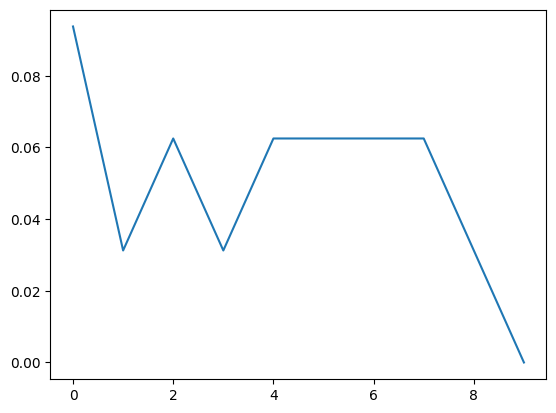

In [129]:
# Gráfico de función e pérdida
# plt.figure(dpi=150)
plt.plot(loss); # aprendió en 9

### Modificando los hiperparámetros

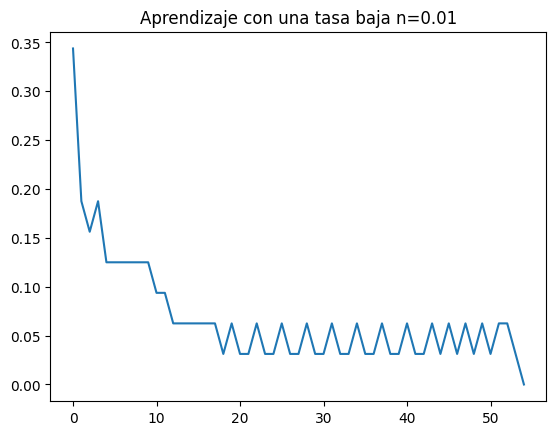

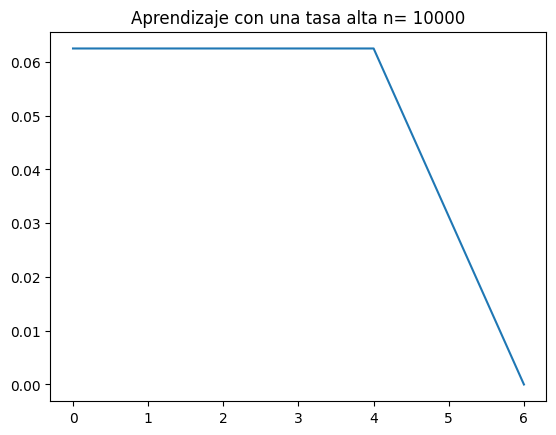

In [143]:
# Un factor de aprendizaje pequeño podría no llegar a converger adecuadamente 

n = 0.01 # factor de aprendizaje
max_it = 200 
p = len(y) #Cuántos patrones debe contar (debe contar que todos estén bien, por eso es 2**5). No hay error.
weight, bias, loss = perceptron(X,y,n,p,max_it)
plt.plot(loss)
plt.title('Aprendizaje con una tasa baja n=0.01')
plt.show()

# un factor muy grande puede tener un comprotamiento oscilatorio, pero acá no se ve muy bien
n = 10000 # factor de aprendizaje
max_it = 200 
p = len(y) #Cuántos patrones debe contar (debe contar que todos estén bien, por eso es 2**5). No hay error.
weight, bias, loss = perceptron(X,y,n,p,max_it)
plt.plot(loss)
plt.title('Aprendizaje con una tasa alta n= 10000')
plt.show()

### Compliquemos el problema

Aunque pueda parecer que lo mejor es tener tasas de aprendizaje altos, en problemas mas complicados eso puede dificultar la convergencia del modelo.

#### Función AND

In [144]:
yB = np.array(list(map(lambda e: e[0] and e[1] and e[2] and e[3] and e[4], X)))

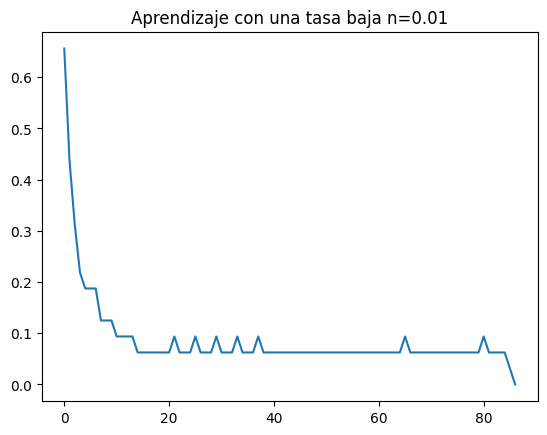

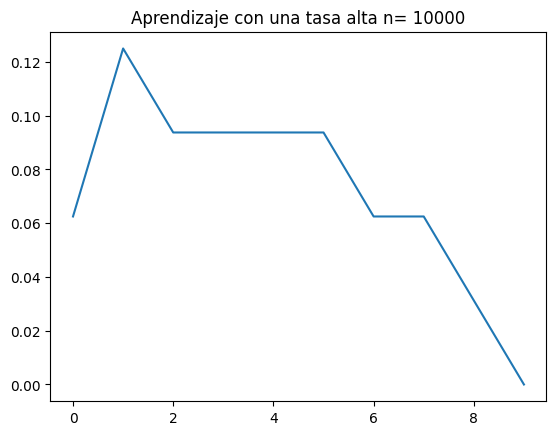

In [147]:
n = 0.01 # factor de aprendizaje
max_it = 200 
p = len(y) #Cuántos patrones debe contar (debe contar que todos estén bien, por eso es 2**5). No hay error.
weight, bias, loss = perceptron(X,yB,n,p,max_it)
plt.plot(loss)
plt.title('Aprendizaje con una tasa baja n=0.01')
plt.show()

# un factor muy grande puede tener un comprotamiento oscilatorio, pero acá no se ve muy bien
n = 10000 # factor de aprendizaje
max_it = 200 
p = len(y) #Cuántos patrones debe contar (debe contar que todos estén bien, por eso es 2**5). No hay error.
weight, bias, loss = perceptron(X,yB,n,p,max_it)
plt.plot(loss)
plt.title('Aprendizaje con una tasa alta n= 10000')
plt.show()

#### Función XOR

In [149]:
def xor(a,b):
  if a == b:
    return 0
  else:
    return 1

yC = np.array(list(map(lambda e: e[0] or xor(e[1],e[2]) or e[3] and e[4], X)))

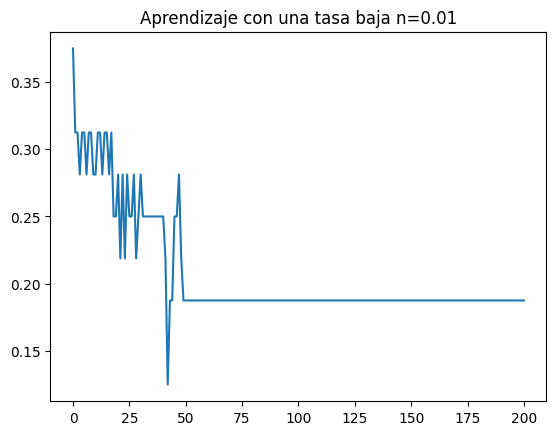

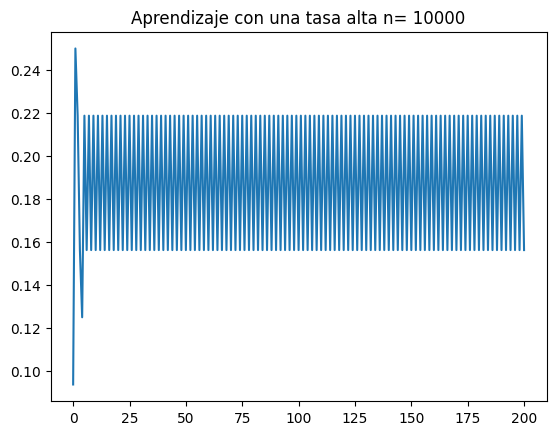

In [150]:
n = 0.01 # factor de aprendizaje
max_it = 200 
p = len(y) #Cuántos patrones debe contar (debe contar que todos estén bien, por eso es 2**5). No hay error.
weight, bias, loss = perceptron(X,yC,n,p,max_it)
plt.plot(loss)
plt.title('Aprendizaje con una tasa baja n=0.01')
plt.show()

# un factor muy grande puede tener un comprotamiento oscilatorio, pero acá no se ve muy bien
n = 10000 # factor de aprendizaje
max_it = 200 
p = len(y) #Cuántos patrones debe contar (debe contar que todos estén bien, por eso es 2**5). No hay error.
weight, bias, loss = perceptron(X,yC,n,p,max_it)
plt.plot(loss)
plt.title('Aprendizaje con una tasa alta n= 10000')
plt.show()

#### **Conclusiones:**
- En problemas complejos de aprendizaje una tasa de aprendizaje muy alta producirá un efecto oscilatorio que en casos, como el nuestro, impedirá una convergencia.
- Tasas muy bajas de aprendizaje tardarán mucho y puede que tampoco converjan.
- En nuestro problema XOR no hay convergencia porque se trata de un problema **no linealmente separable**. Podríamos resolverlo agregando capas ocultas en la forma de un **perceptrón multicapa**.